In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import (
MinMaxScaler,
StandardScaler,
)
from sklearn.decomposition import PCA
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

In [64]:
data = pd.read_csv('/home/miko/anaconda3/envs/PMLDS/PMLDS/Lab5/data/winequality-red.csv',sep=';')
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [65]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: >

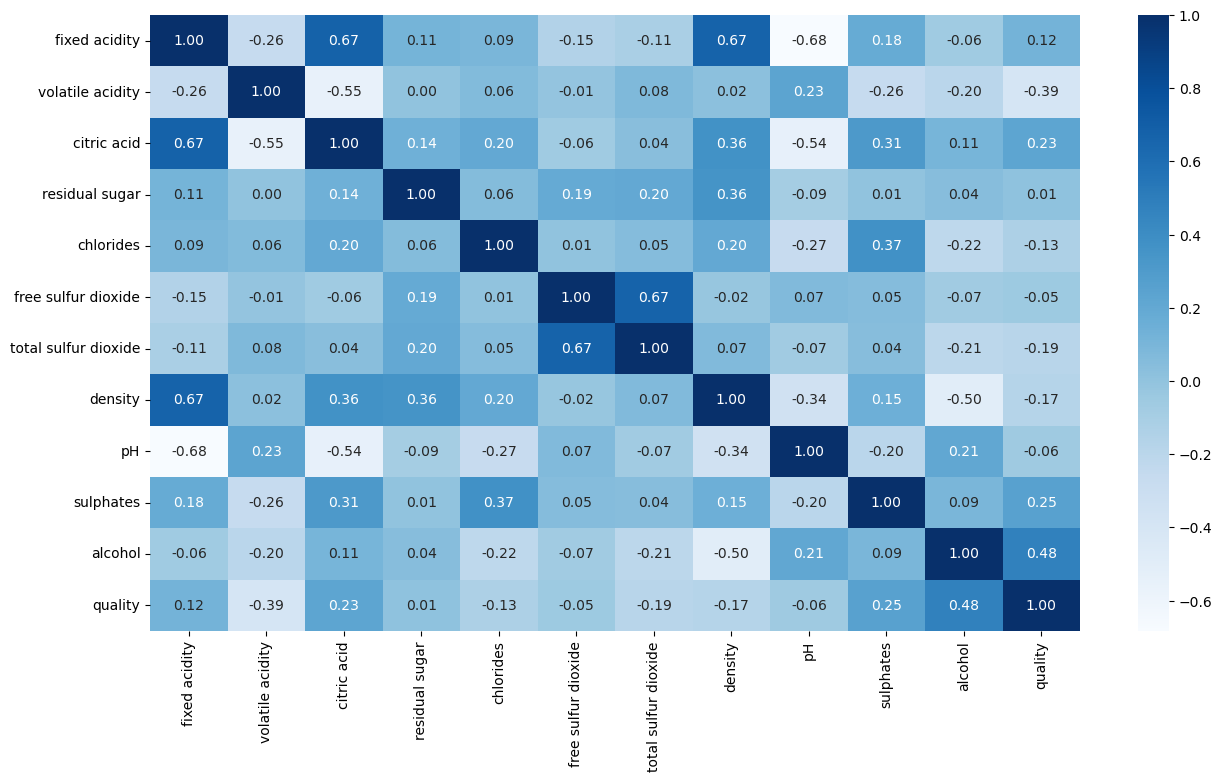

In [66]:
plt.figure(figsize = (15, 8))
sns.heatmap(data.corr(), cmap = 'Blues', annot = True, fmt = '.2f')


Text(0, 0.5, 'Quantity')

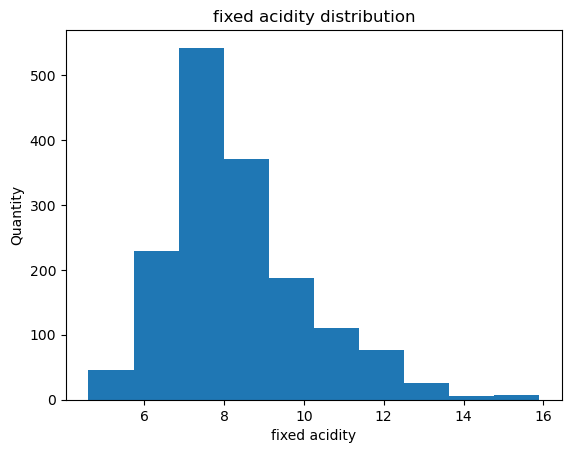

In [67]:
fa = data['fixed acidity']
plt.hist(fa)
plt.title('fixed acidity distribution')
plt.xlabel('fixed acidity')
plt.ylabel('Quantity')

Text(0, 0.5, 'Quantity')

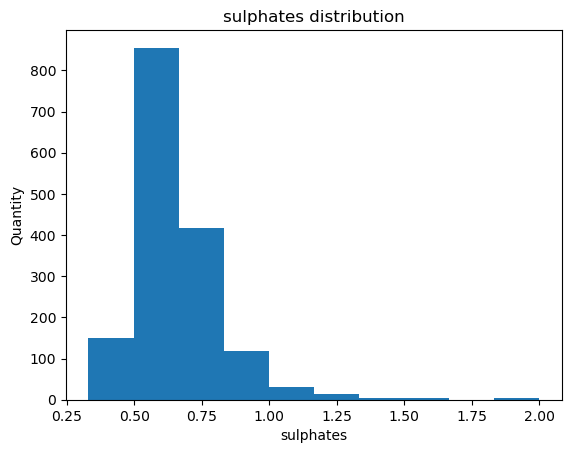

In [68]:
sulph = data['sulphates']
plt.hist(sulph)
plt.title('sulphates distribution')
plt.xlabel('sulphates')
plt.ylabel('Quantity')

Text(0, 0.5, 'Quantity')

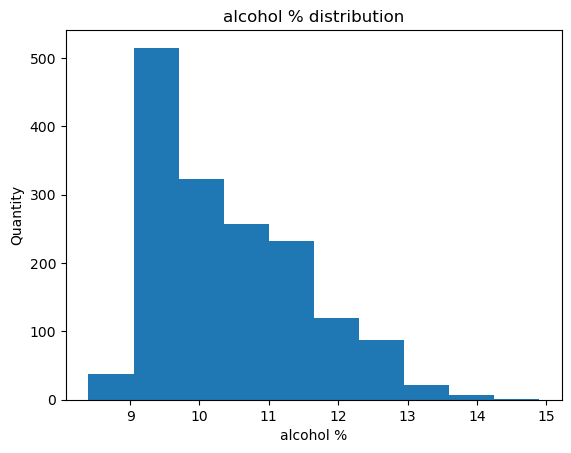

In [69]:
alc = data['alcohol']
plt.hist(alc)
plt.title('alcohol % distribution')
plt.xlabel('alcohol %')
plt.ylabel('Quantity')

Text(0, 0.5, 'Quantity')

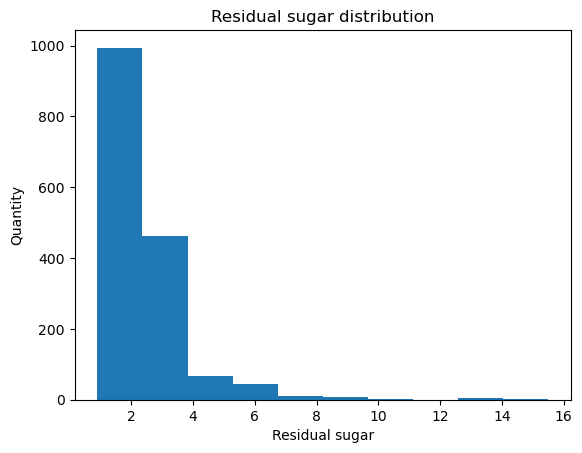

In [70]:
ressug = data['residual sugar']
plt.hist(ressug)
plt.title('Residual sugar distribution')
plt.xlabel('Residual sugar')
plt.ylabel('Quantity')

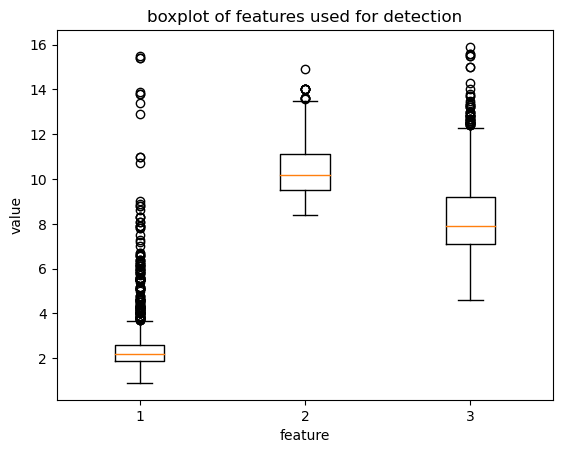

<Figure size 640x480 with 0 Axes>

In [71]:
boxplot_data = [ressug, alc, fa]
# Creating plot
plt.boxplot(boxplot_data)

# show plot
plt.xlabel("feature")
plt.ylabel("value")
plt.title("boxplot of features used for detection")
f1=plt.figure()
plt.show()
f1.savefig('name.png', dpi=600)

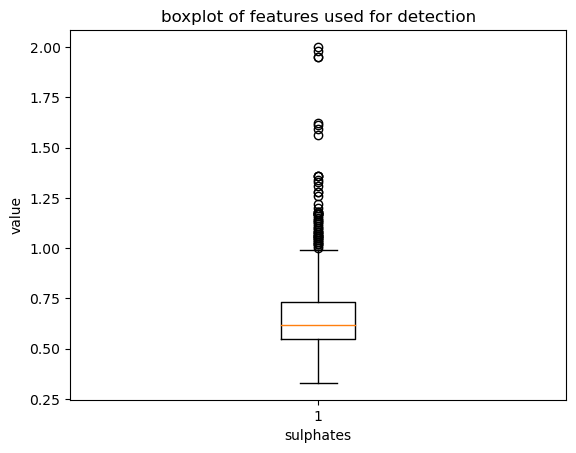

<Figure size 640x480 with 0 Axes>

In [72]:
# Creating plot
plt.boxplot(sulph)

# show plot
plt.xlabel("sulphates")
plt.ylabel("value")
plt.title("boxplot of features used for detection")
f1=plt.figure()
plt.show()
f1.savefig('name.png', dpi=600)

In [73]:
y1_quality = data['quality']
X1_quality=data.drop(columns = ['quality'])

In [74]:
standard_scaler = StandardScaler().set_output(transform="pandas")
data_standardized = standard_scaler.fit_transform(X1_quality)
minmax_scaler = MinMaxScaler().set_output(transform="pandas")
data_normalized = minmax_scaler.fit_transform(X1_quality)

In [75]:
data_standardized.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,3.554936e-16,1.733031e-16,-8.887339e-17,-1.244227e-16,3.732682e-16,-6.221137e-17,4.443669e-17,-3.473172e-14,2.861723e-15,6.754377e-16,1.066481e-16
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-2.137045e+00,-2.278280e+00,-1.391472e+00,-1.162696e+00,-1.603945e+00,-1.422500e+00,-1.230584e+00,-3.538731e+00,-3.700401e+00,-1.936507e+00,-1.898919e+00
25%,-7.007187e-01,-7.699311e-01,-9.293181e-01,-4.532184e-01,-3.712290e-01,-8.487156e-01,-7.440403e-01,-6.077557e-01,-6.551405e-01,-6.382196e-01,-8.663789e-01
50%,-2.410944e-01,-4.368911e-02,-5.636026e-02,-2.403750e-01,-1.799455e-01,-1.793002e-01,-2.574968e-01,1.760083e-03,-7.212705e-03,-2.251281e-01,-2.093081e-01
75%,5.057952e-01,6.266881e-01,7.652471e-01,4.341614e-02,5.384542e-02,4.901152e-01,4.723184e-01,5.768249e-01,5.759223e-01,4.240158e-01,6.354971e-01
max,4.355149e+00,5.877976e+00,3.743574e+00,9.195681e+00,1.112703e+01,5.367284e+00,7.375154e+00,3.680055e+00,4.528282e+00,7.918677e+00,4.202453e+00


(array([ 45., 229., 542., 371., 188., 110.,  76.,  26.,   5.,   7.]),
 array([-2.13704486, -1.48782545, -0.83860605, -0.18938665,  0.45983275,
         1.10905216,  1.75827156,  2.40749096,  3.05671036,  3.70592977,
         4.35514917]),
 <BarContainer object of 10 artists>)

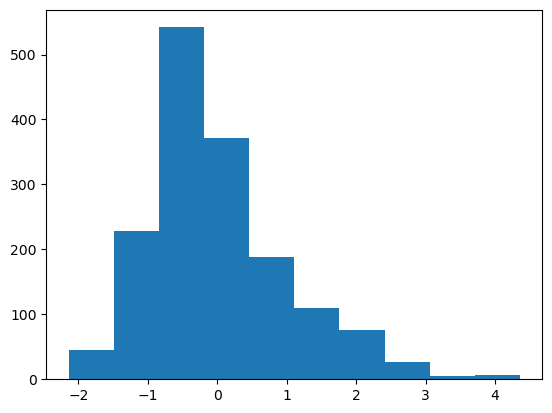

In [76]:
plt.hist(data_standardized['fixed acidity'])


In [77]:
data_normalized.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(array([ 45., 229., 542., 371., 188., 110.,  76.,  26.,   5.,   7.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

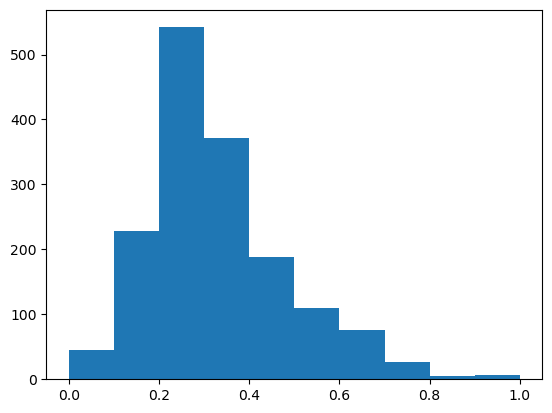

In [78]:
plt.hist(data_normalized['fixed acidity'])


From chat GPT:
Normalization and standardization are two common preprocessing techniques used in data analysis and machine learning to scale and transform numerical features in your dataset. The key difference between them lies in how they scale the data and the impact on the distribution of the features:

1. **Normalization (Min-Max Scaling)**:

   - **Range**: Normalization scales the features to a specific range, typically [0, 1] or [-1, 1]. It ensures that all feature values lie within this range.
   - **Formula**: For each data point, the transformation is done using the formula `(x - min) / (max - min)`, where `x` is the original value, `min` is the minimum value of the feature, and `max` is the maximum value of the feature.
   - **Effect on Distribution**: Normalization does not change the distribution or the shape of the data. It maintains the relative distance between data points.
   - **Use Case**: Normalization is useful when you have features with different scales, and you want to bring them to a common scale. It's also often used with algorithms that rely on the magnitude of values, like support vector machines or k-nearest neighbors.

2. **Standardization (Z-score Scaling)**:

   - **Range**: Standardization scales the features to have a mean of 0 and a standard deviation of 1.
   - **Formula**: For each data point, the transformation is done using the formula `(x - mean) / standard deviation`, where `x` is the original value, `mean` is the mean of the feature, and `standard deviation` is the standard deviation of the feature.
   - **Effect on Distribution**: Standardization centers the data at 0 and changes the distribution of the data to have a mean of 0 and a standard deviation of 1. It makes the data more Gaussian-like (close to a normal distribution).
   - **Use Case**: Standardization is useful when you want to transform the data to have a standard scale and reduce the impact of outliers. It's often used with algorithms that assume the data is normally distributed, like principal component analysis (PCA) and many machine learning algorithms, such as gradient descent-based methods.

In summary, the choice between normalization and standardization depends on the characteristics of your data and the requirements of your specific modeling algorithm. If you're uncertain, it's often a good practice to try both preprocessing techniques and assess their impact on the performance of your model through cross-validation or other evaluation methods.

In [79]:
#standard_scaler = StandardScaler().set_output(transform="pandas")
#X1_quality_normalised = standard_scaler.fit_transform(X1_quality)
minmax_scaler = MinMaxScaler().set_output(transform="pandas")
X1_quality_normalised = minmax_scaler.fit_transform(X1_quality)

In [80]:
X1_quality_normalised.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


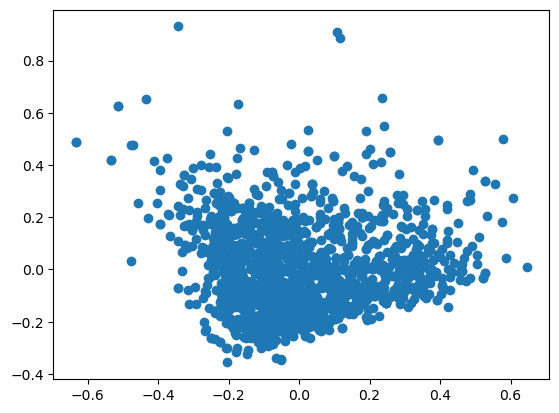

In [85]:
pca = PCA().set_output(transform="pandas").fit(X1_quality_normalised)
data_pca = pca.transform(X1_quality_normalised)
data_pca.describe()
plt.scatter(x=data_pca['pca1'],y=data_pca['pca2'])

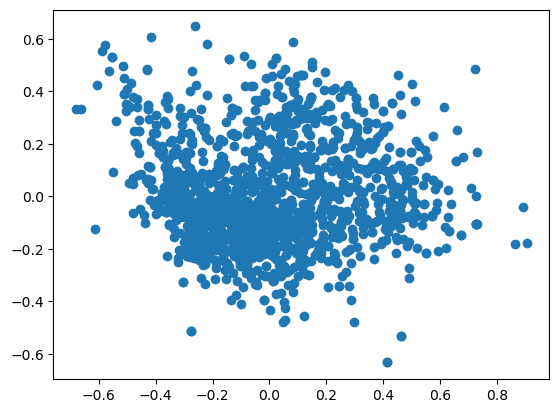

In [82]:
plt.scatter(x=data_pca['pca0'],y=data_pca['pca1'])

Machine learning

In [83]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1_quality_normalised, y1_quality, test_size=0.2, random_state=42)

In [84]:
# Build a shallow neural network using MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(200,), activation='relu', solver='adam', max_iter=100000)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')



# Save the trained model to a file
joblib.dump(model, "shallow_neural_network_model.pkl")

Test Accuracy: 0.5969


['shallow_neural_network_model.pkl']